In [1]:
%matplotlib inline

In [6]:
import os
import yaml

import magicmana as M
import magichistory as H

# Magic Mana

As discussed in the README, the primary function of these modules is to simulate the effect of different mana profiles on a given deck of MTG cards. There are two phases:

1. Run a simulation for a given deck and the different possible mana contributions
2. Analyze the results of that simulation

## Running simulations

Because they are somwhat time consuming, I will only run one simple simulation here -- the more complicated one (the one which we will use to demonstrate the analytic features) was run off-line

In [5]:
fyaml = 'config/jd.simple.yaml'

Generally, this file would be passed directly to the simualtion runner via the function `run_simulation_from_file`. For the purposes of explanation, however, I'll walk you through what this is *actually* doing

In [9]:
with open(fyaml, 'rb') as f:
    params = yaml.load(f)
    
params

{'fdeck': 'data/johnDeck.txt',
 'manaRange': {'blue': [10, 11], 'colorless': [2, 3], 'red': [10, 11]},
 'numGames': 2,
 'roundCutoff': 20,
 'seed': 42}

`fdeck` is the path to the file that contains our deck. We can load that now:

In [10]:
deck = M.load_deck_from_text(params['fdeck'])
deck.head()

,name,white,blue,black,red,green,colorless,total,off,def
0,T Doomsyr,0,0,0,2,0,1,3,2,2
1,Songbirds,0,0,0,1,0,2,3,1,2
2,Bramble,0,2,0,0,0,3,5,4,4
3,Safeguard,0,0,0,1,0,2,3,3,1
4,Mercy,0,0,0,2,0,2,4,NaN,NaN


`manaRange` is a dictionary which we turn into an iterable over the values of mana we feel comfortable adding. Note that the first number is *included* and the second number is *excluded*. For this particular manaRange, we end up with the following mana options:

In [12]:
list(M.mana_options(params['manaRange']))

[(0, (0, 10, 0, 10, 0, 2))]

the return type is an iterable encodes `(deckNum, (white, blue, black, red, green, colorless))`, where `deckNum` is the enumeration of the possible combination of the different mana types in slot two.

`numGames` is the number of games we wish to simulate -- that is to say, we will load the deck, add the mana of this particular mana configuration, and then play `numGames` different games with that mana configuration.

`roundCutoff` is the round after which we call the game and stop taking stats. A null value for this parameter will result in simulations which continue play until all cards have been drawn.

`seed` is the random number seed, used only to reproduce prior simulations. Go wild with it

### Do It To It

In [13]:
M.run_simulation_from_yaml(fyaml)

2015-07-31 23:17:50,611 INFO     [MagicMana.py.full_monte:111] Simulating game with the following mana pool:
2015-07-31 23:17:50,612 DEBUG    [MagicMana.py.full_monte:112] white:     0
2015-07-31 23:17:50,613 DEBUG    [MagicMana.py.full_monte:113] blue:      10
2015-07-31 23:17:50,614 DEBUG    [MagicMana.py.full_monte:114] black:     0
2015-07-31 23:17:50,615 DEBUG    [MagicMana.py.full_monte:115] red:       10
2015-07-31 23:17:50,616 DEBUG    [MagicMana.py.full_monte:116] green:     0
2015-07-31 23:17:50,616 DEBUG    [MagicMana.py.full_monte:117] colorless: 2
2015-07-31 23:17:50,632 INFO     [MagicMana.py.progress_bar:149]   0.00% of games finished (0/2)
2015-07-31 23:17:51,486 INFO     [MagicMana.py.progress_bar:149]  50.00% of games finished (1/2)
2015-07-31 23:17:52,738 DEBUG    [magichistory.save:277] Saving to files: /home/zlamberty/git/Magic/data/jd.simple.deck_profile.pkl, /home/zlamberty/git/Magic/data/jd.simple.game_state.pkl


/home/zlamberty/anaconda/envs/bullshit/lib/python2.7/site-packages/pandas/core/indexing.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


The above caveat seems unstoppable without supressing the warning (as mentioned [here](http://stackoverflow.com/questions/20625582/how-to-deal-with-this-pandas-warning)). Normally it can be avoided with clever (i.e. proper) use of `.loc`, but in this case I just can't seem to figure it out. If you know what I'm doing wrong, I'm all ears.

## Analyzing Results

After running the above, we will have done something cool -- the simulation has run, and the supplied yaml file:

In [14]:
fyaml

'config/jd.simple.yaml'

has been turned into a corresponding data path

In [15]:
M.hist_file_from_yaml(fyaml)

'/home/zlamberty/git/Magic/data/jd.simple.pkl'

where the history of that particular simulation run is stored.

Essentially, all we've done is replace `/config/[yamlname].yaml` with `/data/[yamlname].pkl`. From now on, you can use the yaml configuration file of the simulation to load the history of that simulation, if it has already been run.

Let's turn our attention to a different, more complicated simulation:

In [18]:
fyaml = 'config/zachsmall.yaml'
fhist = M.hist_file_from_yaml(fyaml)
fhist

'/home/zlamberty/git/Magic/data/zachsmall.pkl'

We can load the history object from the `pkl`d file above:

In [22]:
history = H.History()
history.load(fhist)

2015-07-31 23:27:27,517 DEBUG    [magichistory.load:296] Loading from files: /home/zlamberty/git/Magic/data/zachsmall.deck_profile.pkl, /home/zlamberty/git/Magic/data/zachsmall.game_state.pkl


From here, there are three main analyses of interest (at this point)

### Mana Pool Summary

The function `mana_summary()` provides us with some cool graphs detailing the history of the mana pool for our simulations

/home/zlamberty/anaconda/envs/bullshit/lib/python2.7/site-packages/pandas/core/index.py:805: FutureWarning: scalar indexers for index type MultiIndex should be integers and not floating point
  type(self).__name__),FutureWarning)


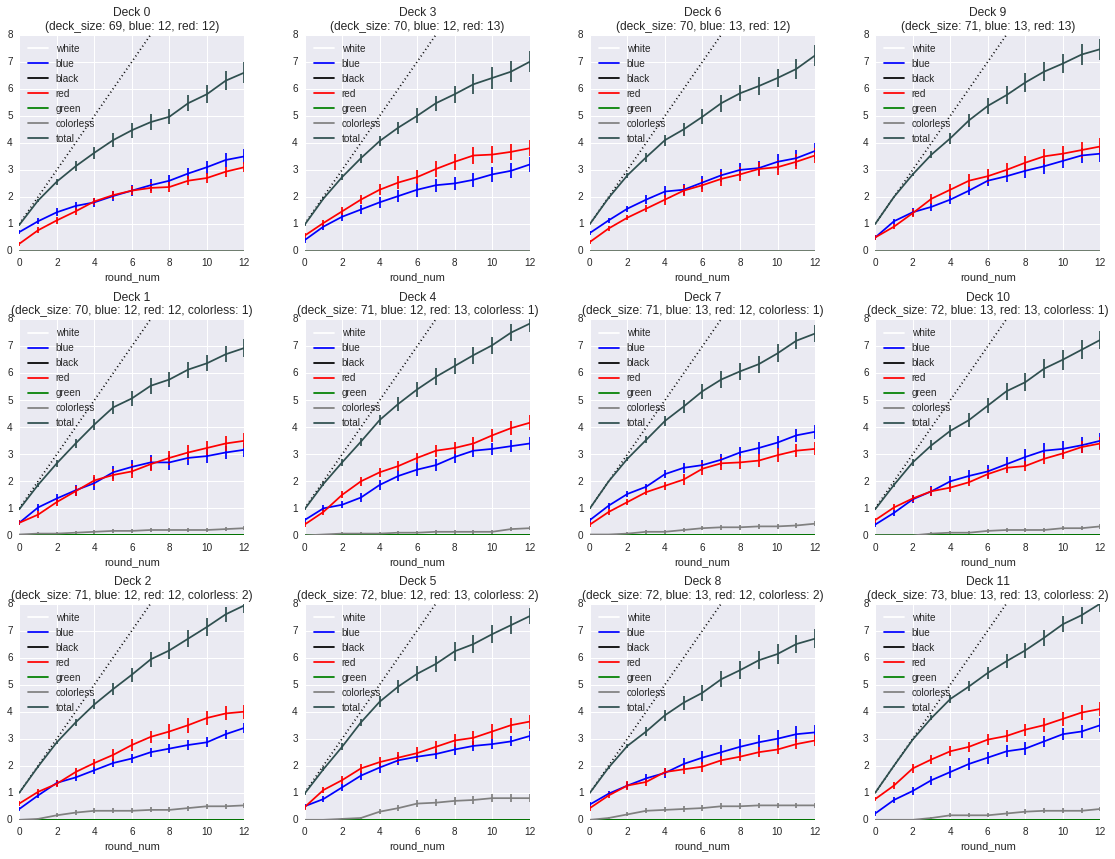

In [23]:
history.mana_summary()

For the above, we have a number of lines:

+ the dotted black line is the "ideal" mana line (one mana added to our mana pool per round). The closer we are to that pool, the better
+ the solid "slate gray" line, which is the total number of mana cards in our pool, regardless of color
+ the colored lines, and
+ the gray "colorless" line, for colorless mana

Right off the bat, we can notice that there are some decks which are closer to our ideal curve (e.g. 4 and 11). We can also notice that low mana counts (leftmost column) are routinely unfavorable relative to their constant-colorless-number (rows) peers. Decks with more red mana are apparently better in the early and mid-game than their blue counterparts as well.

### Number of Cards Summary

We can also look into the number of cards we have in hand, the number we have played in each round, and the cumulative number we have played throughout the games.

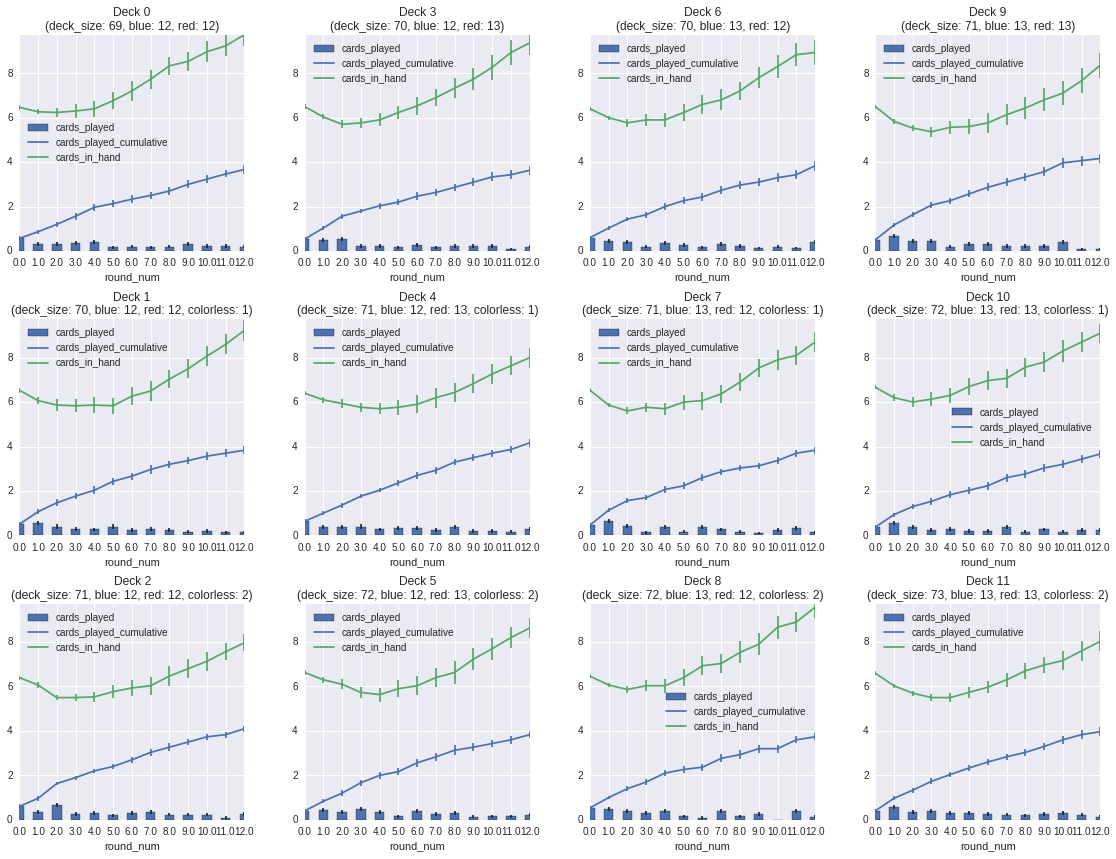

In [24]:
history.num_card_summary()

Magic fans are noting one obvious weekness already -- clearly my model doesn't do a good job (at all) of discarding hands over 7 cards. In the late game those high green lines would correspond directly to wailing and gnashing of teeth.

All the same, it seems clear that in the long run Deck 4 is still looking pretty great -- we have the most cards played by the end of the 12-round trial, on average, and a much more consistency in the cards we can play in the mid-game (rds 5 = 10) than we get in most other mana configurations.

### Offense and Defense Summary

Finally, we may be interested in how the cards we were actually able to play stack up in terms of our offensive and defensive abilities. My simulations are dumb, in a way -- I maximize the number of cards played, without any conception of whether or not it's actually a good idea. This program would cast a 2-mana creature enchantment in round 2 (if the mana is there) even if no creature is there to enchant. That's not a great plan.

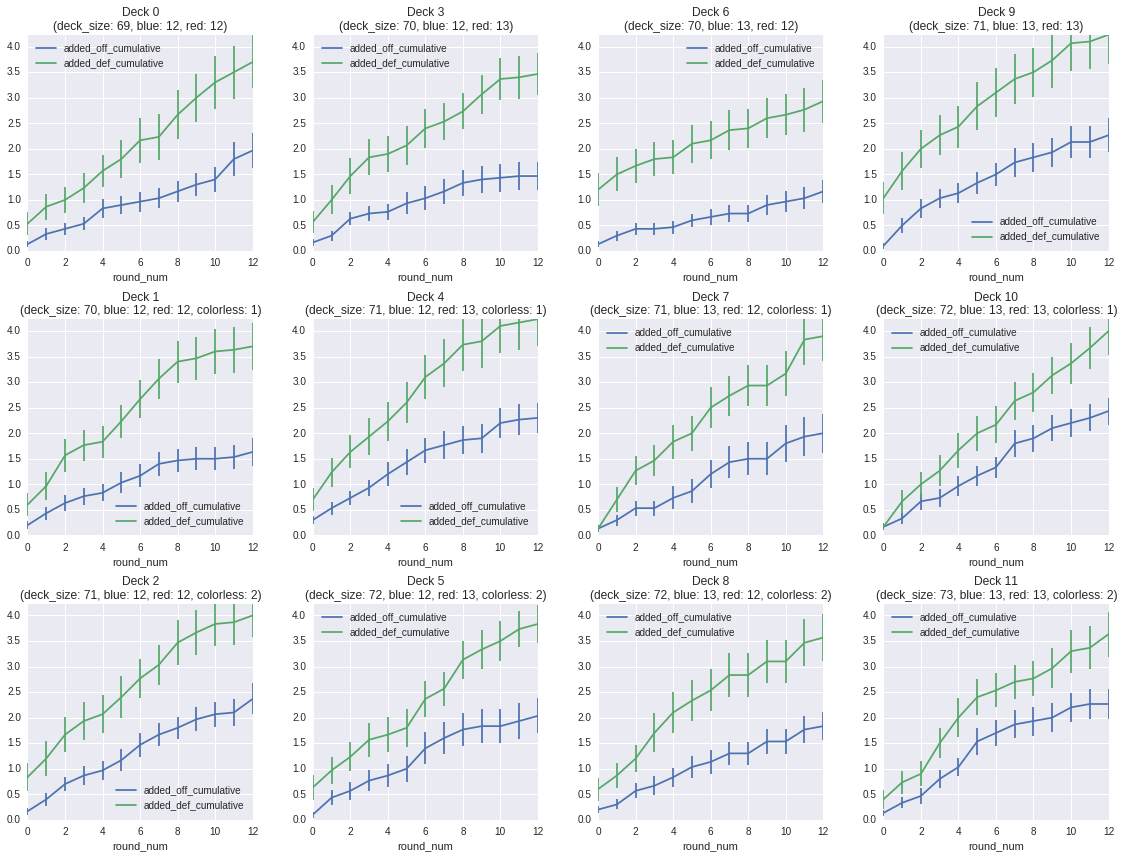

In [25]:
history.off_def_summary()

The small numbers here, evne in round 12, speak to the fact that the underlying decks are incredibly instant / enchantment / sorcery heavy (not surprising, perhaps, for a red/blue deck, and certainly one in which the non-creature spells are cheaper than the creatures).

Deck 4 seems to stand strong in this formulation as well, with a strong ramp-up of the cumulative defensive numbers. The offense leaves something to be desired, of course, but it does for all configurations. Looks to be a problem with the deck itself, and not the availability of mana for this deck.